# KNN, KMEANS

#### install.packages(c("class", "factoextra", "cluster", "jpeg", "ggplot2"))
#### library(class); library(factoextra); library(cluster); library(jpeg); library(ggplot2);

# knn

In [1]:
rm(list=ls())

# algorithm example plot

In [2]:
set.seed(25)
x1 = c(rnorm(15, 0.3, 0.3), rnorm(15, 0.7, 0.3))
x2 = runif(30, 0, 1)
y = c(rep(0, 15), rep(1, 15))

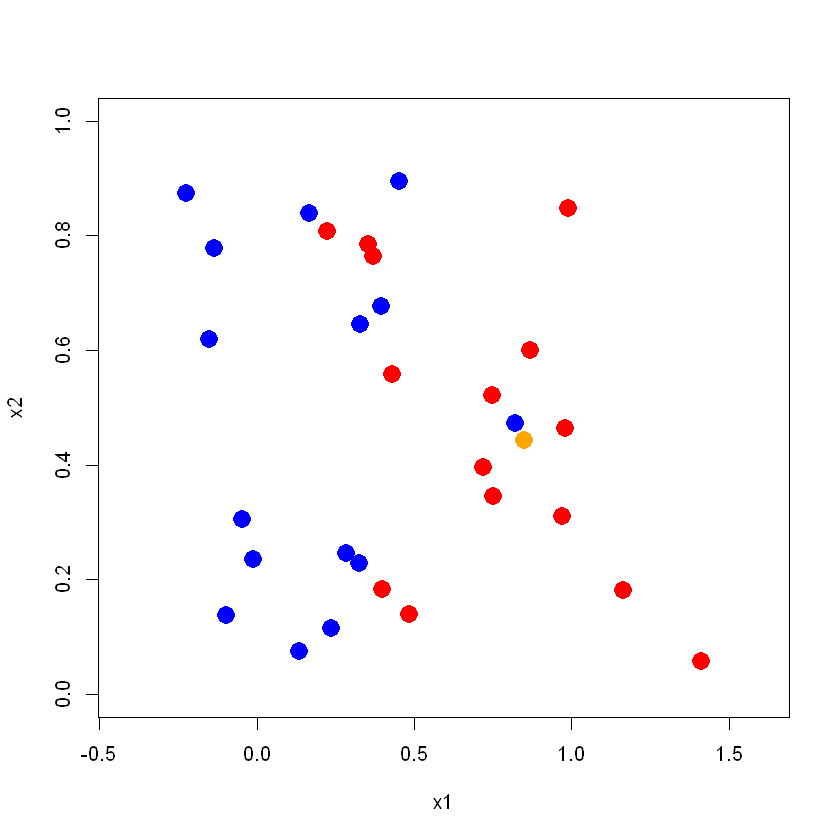

In [3]:
plot(x1, x2, col = ifelse(y == 0, "blue", "red"), pch = 16, cex = 2,
     xlim = c(min(x1) - 0.2, max(x1) + 0.2), ylim = c(0, 1))
index = which(x1 == max(x1[y == 0]))
points(x = x1[index] + 0.03, y = x2[index] - 0.03,
       col = "orange", cex = 2, pch = 16)

# KNN

In [4]:
rm(list=ls())
library(class)
data(iris)

Warning message:
"package 'class' was built under R version 3.6.2"

# train, test split

In [5]:
set.seed(2020)
allrows <- 1:nrow(iris)
trainrows <- sample(allrows, replace = F, size = 0.6 * length(allrows))
train_iris <- iris[trainrows, 1:4]
train_target <- iris[trainrows, 5]

In [6]:
test_iris <- iris[-trainrows, 1:4]
test_target <- iris[-trainrows, 5]
table(test_target)

test_target
    setosa versicolor  virginica 
        18         24         18 

# modeling

In [7]:
result_knn <- knn(train = train_iris, test = test_iris, cl = train_target, k = 3)

# result

In [8]:
table(test_target, result_knn)

            result_knn
test_target  setosa versicolor virginica
  setosa         18          0         0
  versicolor      0         22         2
  virginica       0          1        17

# find best k
# overfitting을 확인하기 위해 train set 예측력도 확인

In [9]:
error.train <- rep(0, 10)
error.test <- rep(0, 10)

In [10]:
for(k in 1:10){
  pred_iris <- knn(train = train_iris, test = train_iris, cl = train_target, k)
  error.train[k]<- 1 - mean(pred_iris == train_target)
  pred_iris <- knn(train = train_iris, test = test_iris, cl = train_target, k)
  error.test[k]<- 1 - mean(pred_iris == test_target)
}

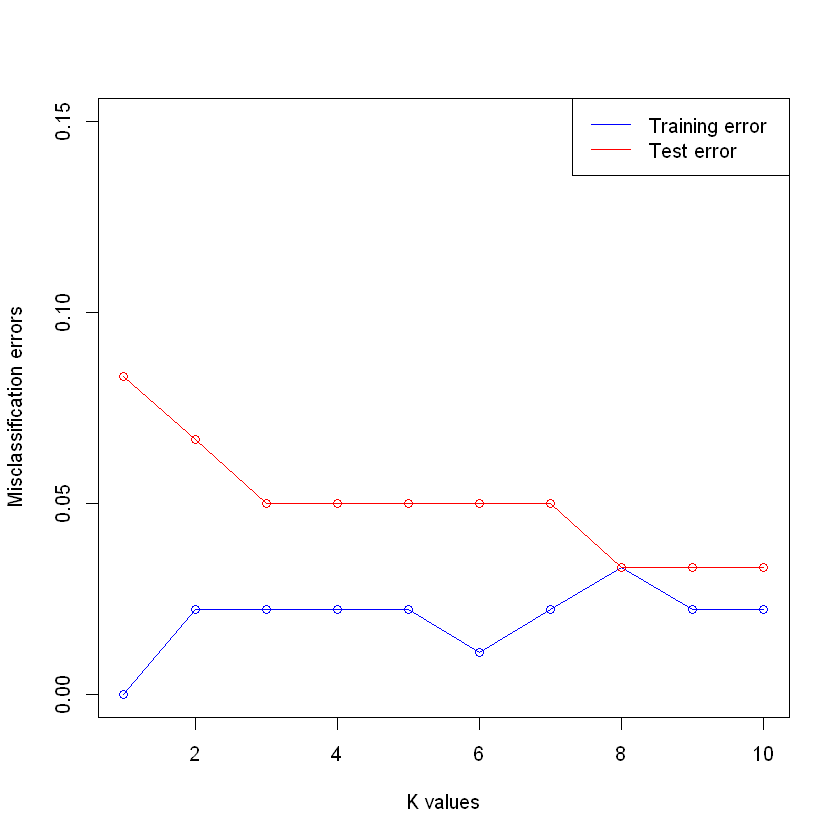

In [11]:
plot(error.train, type = "o", ylim = c(0,0.15),
     col = "blue", xlab = "K values", ylab = "Misclassification errors")
lines(error.test, type = "o", col="red")
legend("topright", legend = c("Training error","Test error"),
       col = c("blue","red"), lty = 1:1)

# K-means

In [12]:
rm(list=ls())

# dataset 객체 할당 및 target 변수 분리

In [13]:
data(iris)
data_iris <- iris
data_iris <- data_iris[, -5]
target <- iris$Species

# n_cluster = 3으로 설정

In [14]:
set.seed(1234)
model_km <- kmeans(data_iris, 3, nstart = 5)
model_km

K-means clustering with 3 clusters of sizes 50, 62, 38

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.006000    3.428000     1.462000    0.246000
2     5.901613    2.748387     4.393548    1.433871
3     6.850000    3.073684     5.742105    2.071053

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

Within cluster sum of squares by cluster:
[1] 15.15100 39.82097 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [15]:
table(target, model_km$cluster)

            
target        1  2  3
  setosa     50  0  0
  versicolor  0 48  2
  virginica   0 14 36

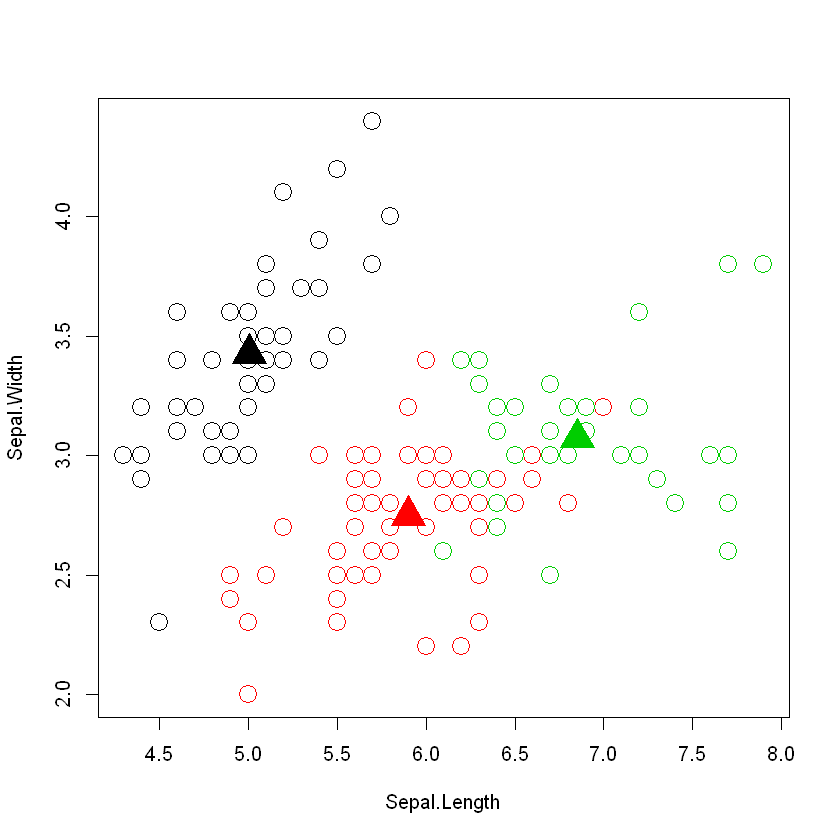

In [16]:
plot(data_iris[, c("Sepal.Length", "Sepal.Width")],
     col = model_km$cluster, cex = 2, pch = 1)
points(model_km$centers[, c("Sepal.Length", "Sepal.Width")],
       col = 1:3, cex = 3, pch = 17)

# elbow - method 1

In [17]:
set.seed(1234)
func_kmeans <- function(data, k){
  kmeans(data, k, nstart = 5)$tot.withinss
}

In [18]:
k.values <- 1:15
SSE <- rep(0, 15)
for(k in k.values){
  SSE[k] <- func_kmeans(data_iris, k)
}

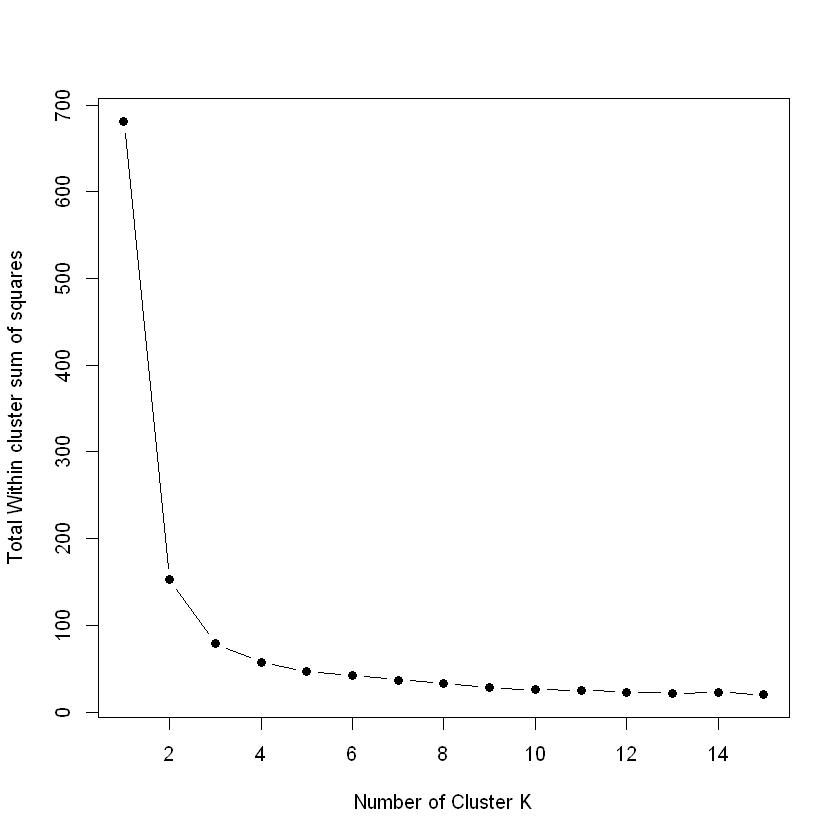

In [19]:
plot(x = k.values, y = SSE, type = "b", pch = 19,
     xlab = "Number of Cluster K", ylab = "Total Within cluster sum of squares")

# elbow - method 2

Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


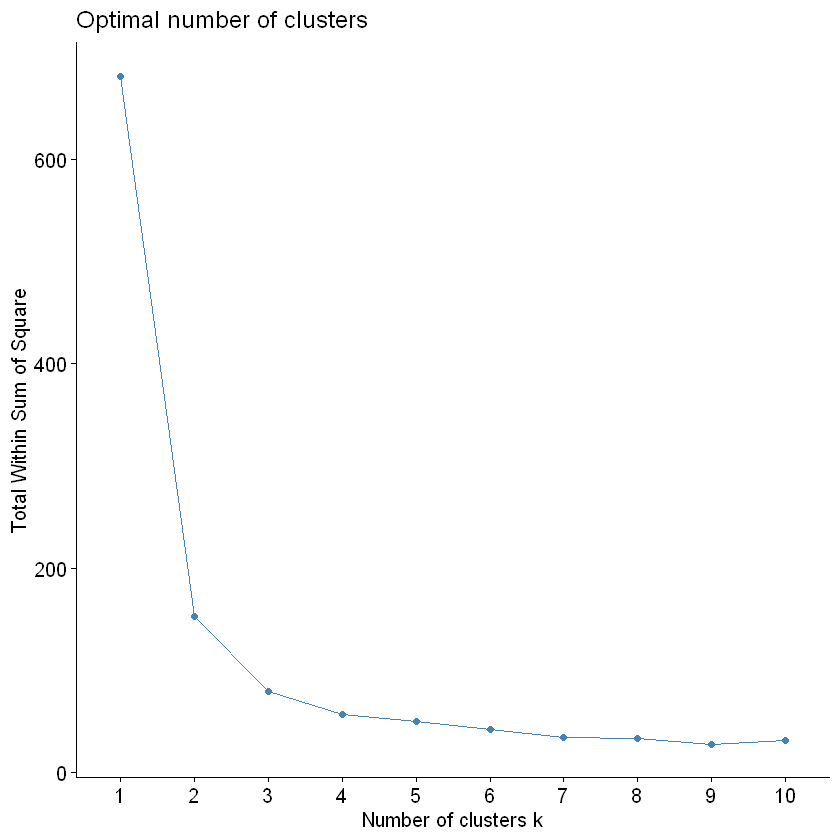

In [20]:
library(factoextra)
fviz_nbclust(data_iris, kmeans, method = "wss")

# silhouette

Warning message:
"package 'cluster' was built under R version 3.6.3"

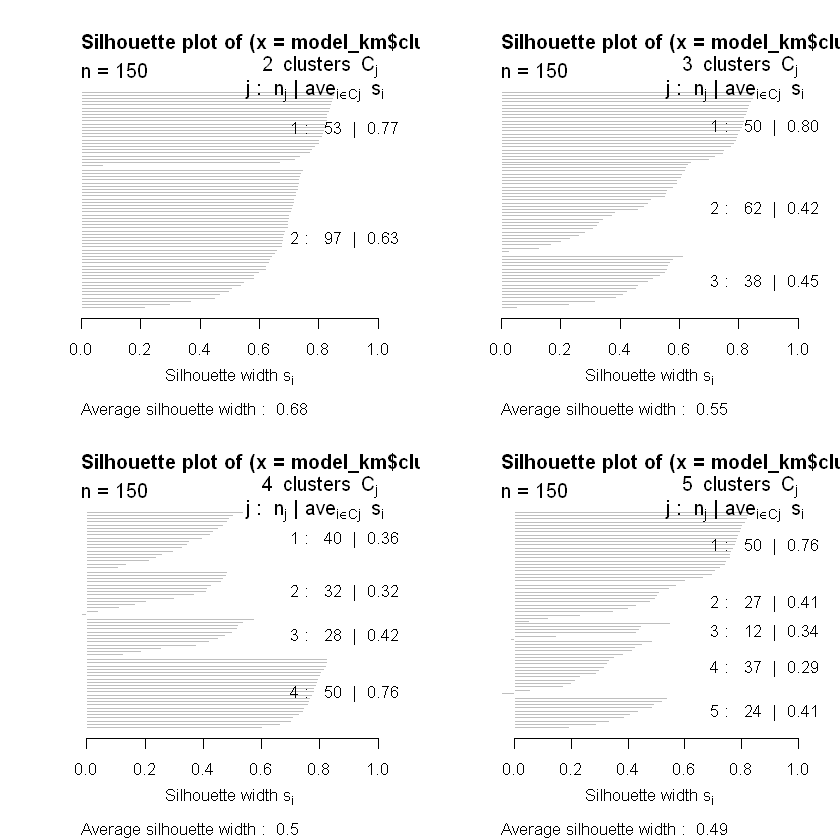

In [21]:
library(cluster)
par(mfrow = c(2, 2))
for(k in 2:5){
  set.seed(1234)
  model_km <- kmeans(data_iris, k, nstart = 5)
  plot(silhouette(model_km$cluster, dist = dist(data_iris)))
}

# method 2

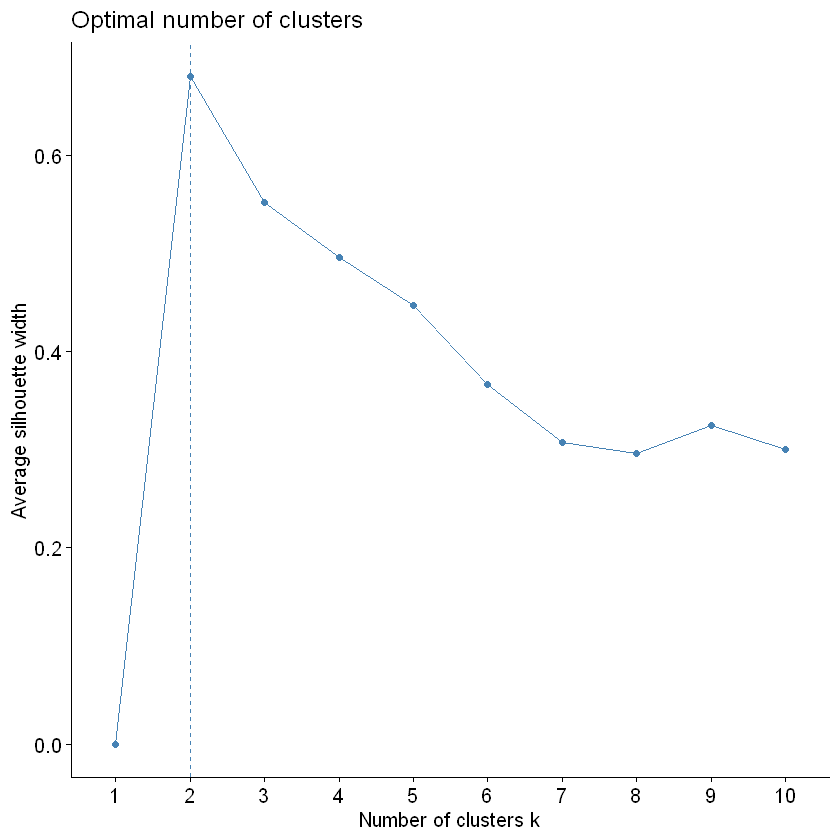

In [22]:
library(factoextra)
fviz_nbclust(data_iris, kmeans, method = "silhouette")

# kmeans를 활용한 image 분석

In [23]:
setwd("C:/Users/yongheon/Desktop/동국대학교/비어플/knn_kmeans")

# Load the package

In [24]:
library(jpeg)
library(ggplot2)

# Read the image

In [25]:
img <- readJPEG("ColorfulBird.jpg")

In [26]:
str(img)

 num [1:526, 1:800, 1:3] 0.00392 0.00392 0.00392 0.00392 0.00392 ...


In [27]:
dim(img)

[1] 526 800   3

In [28]:
class(img)

[1] "array"

In [29]:
img[100:101, 100:101, ]

, , 1

          [,1]      [,2]
[1,] 0.3098039 0.3176471
[2,] 0.3176471 0.3098039

, , 2

          [,1]      [,2]
[1,] 0.3058824 0.3137255
[2,] 0.3137255 0.3058824

, , 3

          [,1]      [,2]
[1,] 0.2862745 0.2941176
[2,] 0.2941176 0.2862745

# Obtain the dimension

In [30]:
imgDm <- dim(img)

# Assign RGB channels to data frame

In [31]:
imgRGB <- data.frame(
  x = rep(1:imgDm[2], each = imgDm[1]),
  y = rep(imgDm[1]:1, imgDm[2]),
  R = as.vector(img[,,1]),
  G = as.vector(img[,,2]),
  B = as.vector(img[,,3])
)

In [32]:
head(imgRGB)

x,y,R,G,B
1,526,0.003921569,0.003921569,0.003921569
1,525,0.003921569,0.003921569,0.003921569
1,524,0.003921569,0.003921569,0.003921569
1,523,0.003921569,0.003921569,0.003921569
1,522,0.003921569,0.003921569,0.003921569
1,521,0.007843137,0.007843137,0.007843137


In [33]:
rgb(head(imgRGB[c("R", "G", "B")]))

[1] "#010101" "#010101" "#010101" "#010101" "#010101" "#020202"

In [34]:
summary(imgRGB)

       x               y               R                G         
 Min.   :  1.0   Min.   :  1.0   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:200.8   1st Qu.:132.0   1st Qu.:0.2078   1st Qu.:0.1804  
 Median :400.5   Median :263.5   Median :0.3647   Median :0.3216  
 Mean   :400.5   Mean   :263.5   Mean   :0.4713   Mean   :0.3476  
 3rd Qu.:600.2   3rd Qu.:395.0   3rd Qu.:0.8431   3rd Qu.:0.4471  
 Max.   :800.0   Max.   :526.0   Max.   :1.0000   Max.   :1.0000  
       B         
 Min.   :0.0000  
 1st Qu.:0.1333  
 Median :0.2941  
 Mean   :0.3586  
 3rd Qu.:0.5059  
 Max.   :1.0000  

# Plot the image

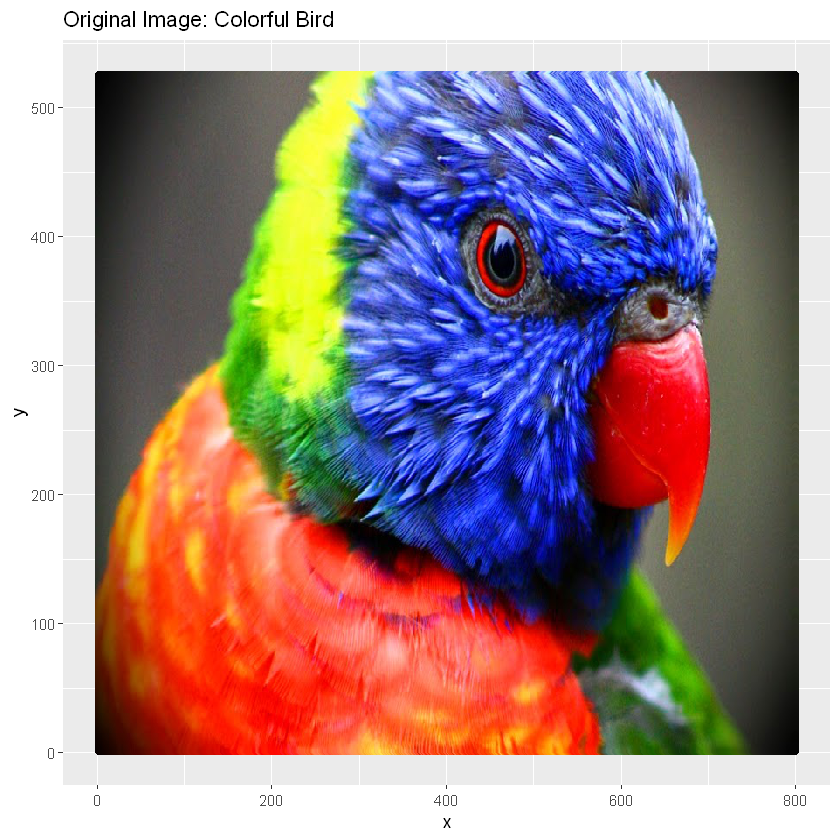

In [35]:
ggplot(data = imgRGB, aes(x = x, y = y)) + 
  geom_point(colour = rgb(imgRGB[c("R", "G", "B")])) +
  labs(title = "Original Image: Colorful Bird") +
  xlab("x") +
  ylab("y")

# clustering k = 2

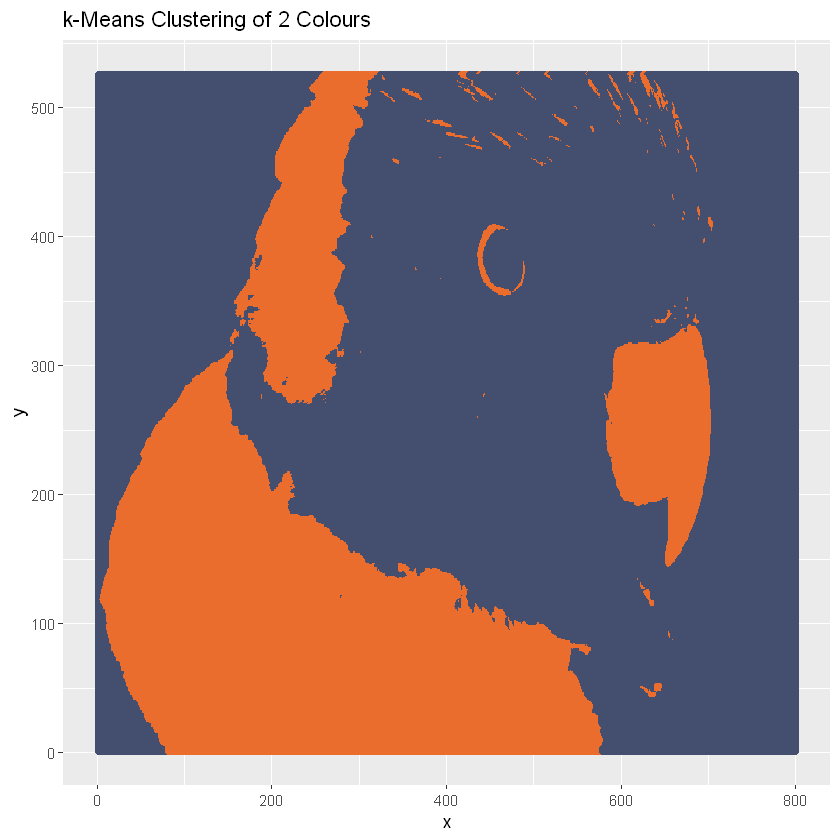

In [36]:
kClusters <- 2
kMeans <- kmeans(imgRGB[, c("R", "G", "B")], centers = kClusters)
kColours <- rgb(kMeans$centers[kMeans$cluster,])

ggplot(data = imgRGB, aes(x = x, y = y)) + 
  geom_point(colour = kColours) +
  labs(title = paste("k-Means Clustering of", kClusters, "Colours")) +
  xlab("x") +
  ylab("y")

# clustering k = 3

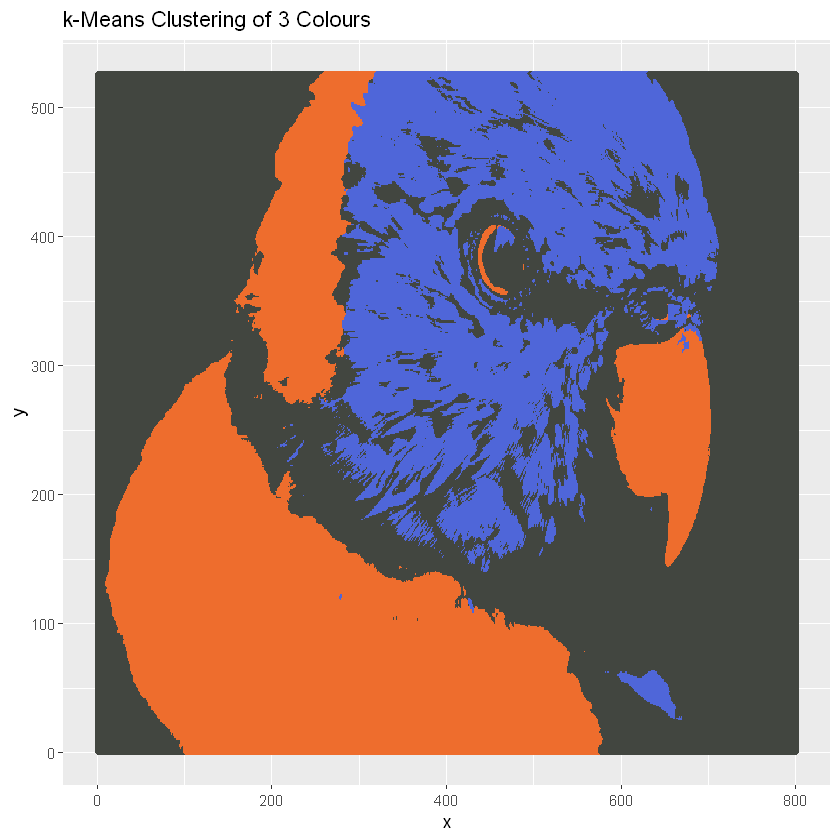

In [37]:
kClusters <- 3
kMeans <- kmeans(imgRGB[, c("R", "G", "B")], centers = kClusters)
kColours <- rgb(kMeans$centers[kMeans$cluster,])

ggplot(data = imgRGB, aes(x = x, y = y)) + 
  geom_point(colour = kColours) +
  labs(title = paste("k-Means Clustering of", kClusters, "Colours")) +
  xlab("x") +
  ylab("y")

# clustering  k = 4

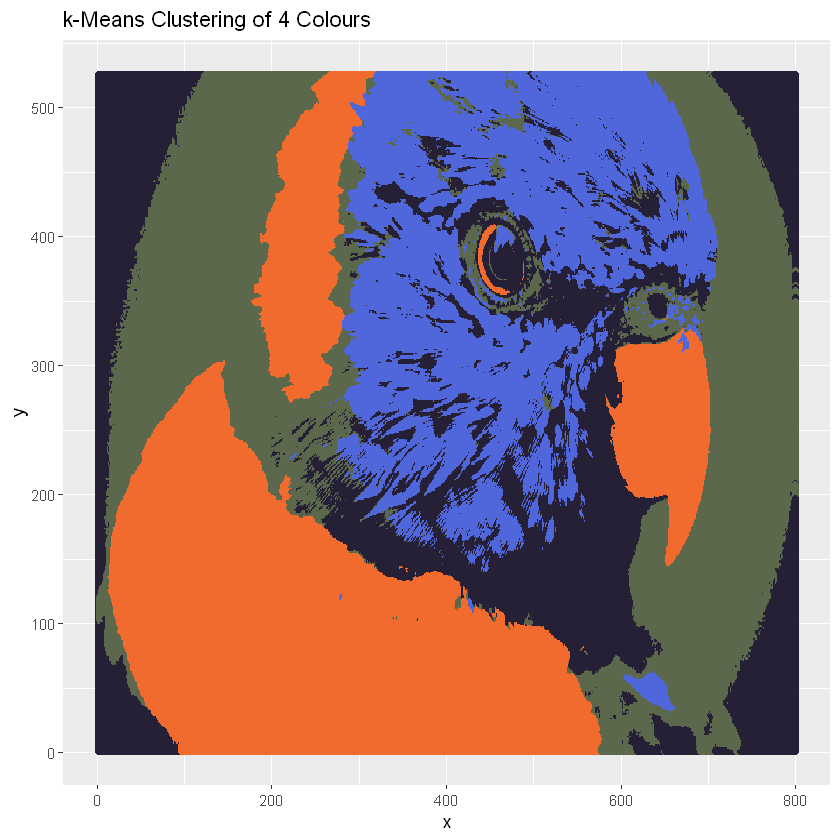

In [38]:
kClusters <- 4
kMeans <- kmeans(imgRGB[, c("R", "G", "B")], centers = kClusters)
kColours <- rgb(kMeans$centers[kMeans$cluster,])

ggplot(data = imgRGB, aes(x = x, y = y)) + 
  geom_point(colour = kColours) +
  labs(title = paste("k-Means Clustering of", kClusters, "Colours")) +
  xlab("x") +
  ylab("y")

# clustering k = 5

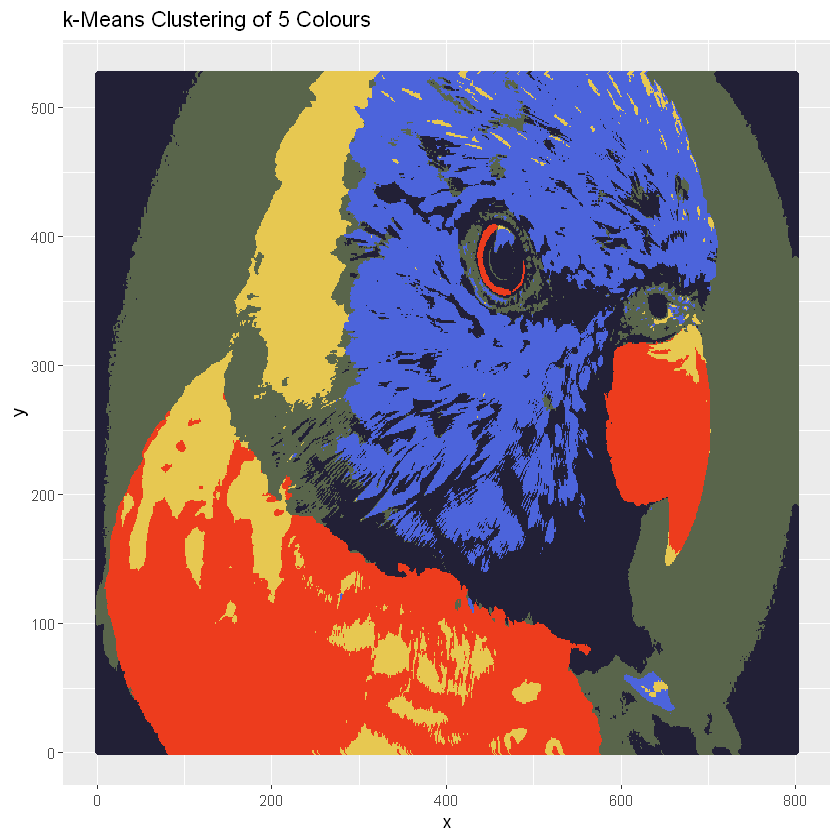

In [39]:
kClusters <- 5
kMeans <- kmeans(imgRGB[, c("R", "G", "B")], centers = kClusters)
kColours <- rgb(kMeans$centers[kMeans$cluster,])

ggplot(data = imgRGB, aes(x = x, y = y)) + 
  geom_point(colour = kColours) +
  labs(title = paste("k-Means Clustering of", kClusters, "Colours")) +
  xlab("x") +
  ylab("y")

# clustering k = 10

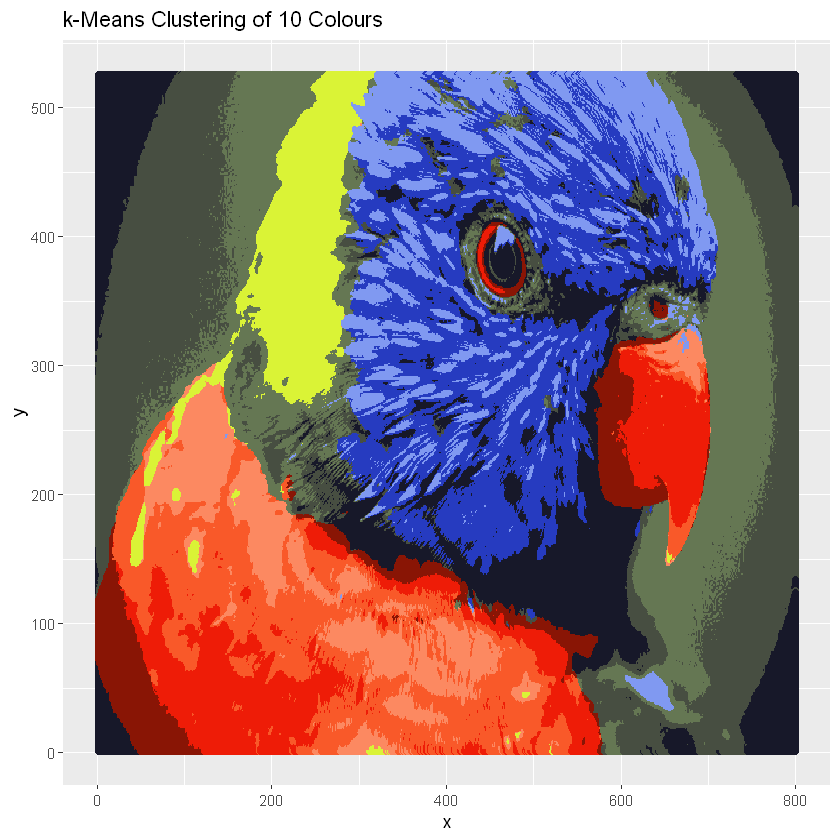

In [40]:
kClusters <- 10
kMeans <- kmeans(imgRGB[, c("R", "G", "B")], centers = kClusters)
kColours <- rgb(kMeans$centers[kMeans$cluster,])

ggplot(data = imgRGB, aes(x = x, y = y)) + 
  geom_point(colour = kColours) +
  labs(title = paste("k-Means Clustering of", kClusters, "Colours")) +
  xlab("x") +
  ylab("y")